In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# %%
# Cargo datos de entrenamiento 
archivo =  '../data/processed/X_train.feather'
X_train = pd.read_feather(archivo )
X_train.drop(['index'],axis=1)
print(X_train.shape)

archivo = '../data/processed/y_train.feather'
y_train = pd.read_feather(archivo )
y_train = y_train['es_desertor']
print(y_train.shape)

# %%
# cargo datos de test 
archivo =  '../data/processed/X_test.feather'
X_test= pd.read_feather(archivo )
X_test.drop(['index'],axis=1)
print(X_test.shape)

archivo = '../data/processed/y_test.feather'
y_test = pd.read_feather(archivo )
y_test = y_test['es_desertor']
print(y_test.shape)

(100794, 95)
(100794,)
(25199, 95)
(25199,)


In [3]:
X_test = X_test.drop(['index'],axis=1)
X_train = X_train.drop(['index'],axis=1)

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
boost_classifier = GradientBoostingClassifier()

boost_classifier.fit(X_train,y_train)

print("Train: ",boost_classifier.score(X_train, y_train))
print("Test: ",boost_classifier.score(X_test, y_test))

Y_pred_BOO = boost_classifier.predict(X_test)

print('Precisión Boosting: {}'.format(boost_classifier.score(X_test, y_test)))


Train:  0.9126039248367959
Test:  0.9134886305012103
Precisión Boosting: 0.9134886305012103


In [5]:
#Metricas
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred_BOO))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     20331
           1       0.85      0.67      0.75      4868

    accuracy                           0.91     25199
   macro avg       0.89      0.82      0.85     25199
weighted avg       0.91      0.91      0.91     25199



In [6]:
boost_classifier_tuned = GradientBoostingClassifier(learning_rate=0.3)
boost_classifier_tuned.fit(X_train, y_train)

print("Train: ",boost_classifier_tuned.score(X_train, y_train))
print("Test: ",boost_classifier_tuned.score(X_test, y_test))

Y_pred_BOO_tuned = boost_classifier_tuned.predict(X_test)


print('Precisión Boosting: {}'.format(boost_classifier_tuned.score(X_test, y_test)))


Train:  0.9155406075758478
Test:  0.9134489463867613
Precisión Boosting: 0.9134489463867613


In [7]:
#Reviso con MAtriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred_BOO_tuned)

print(cm)

[[19753   578]
 [ 1603  3265]]


In [8]:
#Metricas
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred_BOO_tuned))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     20331
           1       0.85      0.67      0.75      4868

    accuracy                           0.91     25199
   macro avg       0.89      0.82      0.85     25199
weighted avg       0.91      0.91      0.91     25199



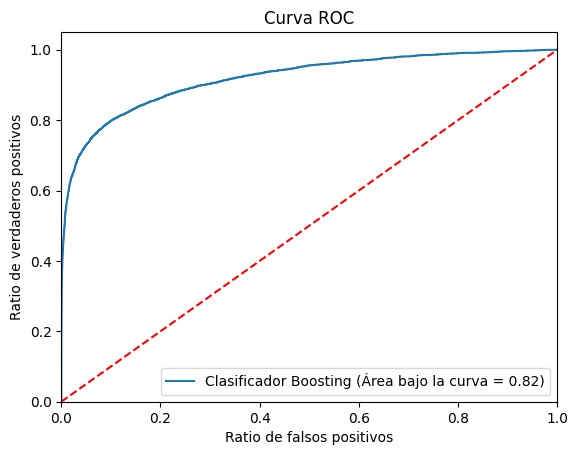

In [9]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, boost_classifier_tuned.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, boost_classifier_tuned.predict_proba(X_test)[:,1])
roc_boo = round(logit_roc_auc,2)
plt.figure()
plt.plot(fpr, tpr, label='Clasificador Boosting (Área bajo la curva = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratio de falsos positivos')
plt.ylabel('Ratio de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC') si descomentas esta línea puedes guardar la gráfica
plt.show()
